Distance Matrix:
[[ 0.   50.17 82.42 32.76 33.2 ]
 [50.17  0.   72.64 72.51 17.06]
 [82.42 72.64  0.   71.69 70.92]
 [32.76 72.51 71.69  0.   56.56]
 [33.2  17.06 70.92 56.56  0.  ]]
Iteration 1/100 - Best length: 227.35
Iteration 2/100 - Best length: 227.35
Iteration 3/100 - Best length: 227.35
Iteration 4/100 - Best length: 227.35
Iteration 5/100 - Best length: 227.35
Iteration 6/100 - Best length: 227.35
Iteration 7/100 - Best length: 227.35
Iteration 8/100 - Best length: 227.35
Iteration 9/100 - Best length: 227.35
Iteration 10/100 - Best length: 227.35
Iteration 11/100 - Best length: 227.35
Iteration 12/100 - Best length: 227.35
Iteration 13/100 - Best length: 227.35
Iteration 14/100 - Best length: 227.35
Iteration 15/100 - Best length: 227.35
Iteration 16/100 - Best length: 227.35
Iteration 17/100 - Best length: 227.35
Iteration 18/100 - Best length: 227.35
Iteration 19/100 - Best length: 227.35
Iteration 20/100 - Best length: 227.35
Iteration 21/100 - Best length: 227.35
Iterati

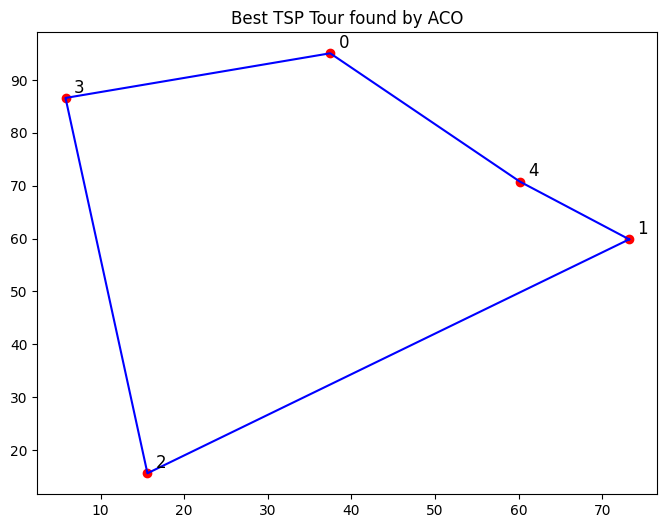

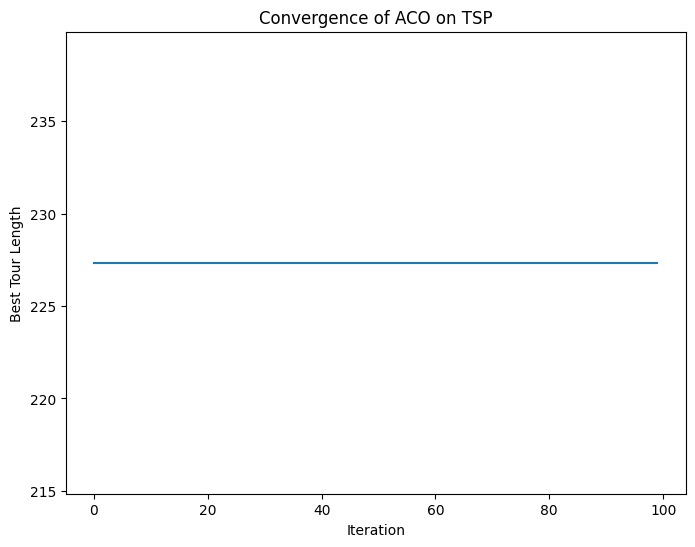

In [3]:
# Ant Colony Optimization (ACO) for Travelling Salesman Problem (TSP)
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# TSP Problem Setup
# -----------------------------
np.random.seed(42)
num_cities = 5
cities = np.random.rand(num_cities, 2) * 100  # 2D coordinates

# Distance matrix
def euclidean_distance(c1, c2):
    return np.linalg.norm(c1 - c2)

dist_matrix = np.array([[euclidean_distance(c1, c2) for c2 in cities] for c1 in cities])

# Print the distance matrix
print("Distance Matrix:")
print(np.round(dist_matrix, 2))

# -----------------------------
# ACO Parameters
# -----------------------------
num_ants = 20
num_iterations = 100
alpha = 1        # Pheromone importance
beta = 5         # Distance importance
evaporation = 0.5
Q = 100          # Pheromone constant

pheromone = np.ones((num_cities, num_cities))  # Initial pheromone

# -----------------------------
# ACO Core Functions
# -----------------------------
def probability(pheromone, dist_matrix, alpha, beta, current_city, unvisited):
    pheromone_vals = pheromone[current_city][unvisited] ** alpha
    heuristic_vals = (1 / dist_matrix[current_city][unvisited]) ** beta
    probs = pheromone_vals * heuristic_vals
    return probs / probs.sum()

def ant_solution(pheromone, dist_matrix, alpha, beta):
    num_cities = dist_matrix.shape[0]
    start = np.random.randint(num_cities)
    tour = [start]
    unvisited = list(range(num_cities))
    unvisited.remove(start)

    while unvisited:
        current_city = tour[-1]
        probs = probability(pheromone, dist_matrix, alpha, beta, current_city, unvisited)
        next_city = np.random.choice(unvisited, p=probs)
        tour.append(next_city)
        unvisited.remove(next_city)

    return tour

def tour_length(tour, dist_matrix):
    return sum(dist_matrix[tour[i]][tour[(i+1) % len(tour)]] for i in range(len(tour)))

# -----------------------------
# Main ACO Loop
# -----------------------------
best_tour = None
best_length = float("inf")
best_lengths = []

for iteration in range(num_iterations):
    all_tours = []
    all_lengths = []

    # Each ant constructs a solution
    for ant in range(num_ants):
        tour = ant_solution(pheromone, dist_matrix, alpha, beta)
        length = tour_length(tour, dist_matrix)
        all_tours.append(tour)
        all_lengths.append(length)

        # Update best
        if length < best_length:
            best_tour = tour
            best_length = length

    best_lengths.append(best_length)

    # Pheromone evaporation
    pheromone *= (1 - evaporation)

    # Pheromone update
    for tour, length in zip(all_tours, all_lengths):
        for i in range(len(tour)):
            a, b = tour[i], tour[(i + 1) % len(tour)]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length

    print(f"Iteration {iteration+1}/{num_iterations} - Best length: {best_length:.2f}")

# -----------------------------
# Results
# -----------------------------
print("\nBest tour found:", best_tour)
print("Best tour length:", round(best_length, 2))

# Print final pheromone matrix
print("\nFinal Pheromone Matrix:")
print(np.round(pheromone, 3))

# Plot best tour
best_coords = cities[best_tour + [best_tour[0]]]  # close the loop
plt.figure(figsize=(8,6))
plt.scatter(cities[:,0], cities[:,1], c='red')
plt.plot(best_coords[:,0], best_coords[:,1], c='blue')
for i, (x, y) in enumerate(cities):
    plt.text(x+1, y+1, str(i), fontsize=12)  # label cities
plt.title("Best TSP Tour found by ACO")
plt.show()

# Plot convergence
plt.figure(figsize=(8,6))
plt.plot(best_lengths)
plt.title("Convergence of ACO on TSP")
plt.xlabel("Iteration")
plt.ylabel("Best Tour Length")
plt.show()
